# **NBA Scored Points Prediction**


In [1]:
print("test")

test


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df= pd.read_csv("NBA.csv.csv")

In [5]:
df.head(5)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [6]:
df.shape
#539 rows and 30 columns

(539, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [8]:
df.drop(columns=['PName', 'POS', 'Team', 'FG%', '3PM', '3PA',
                 '3P%','FTA', 'FT%','OREB',
                 'DREB','TD3'],
        inplace=True)

In [9]:
points_df = df[['Age','Min','PTS','FGM','FGA','FTM','REB','AST','+/-']]
points_df

,Age,Min,PTS,FGM,FGA,FTM,REB,AST,+/-
0,25,2732.2,2225,727,1559,531,649,342,470
1,29,2284.1,2183,728,1328,661,670,274,424
2,24,2390.5,2138,719,1449,515,569,529,128
3,24,2416.0,2135,704,1381,669,329,371,149
4,28,2023.6,1959,707,1278,498,742,359,341
...,...,...,...,...,...,...,...,...,...
534,23,5.3,0,0,0,0,1,0,-5
535,29,6.5,0,0,2,0,0,0,5
536,24,5.0,0,0,3,0,2,1,-2
537,20,1.0,0,0,0,0,0,0,-2


In [10]:
points_df.describe(include= np.number)

,Age,Min,PTS,FGM,FGA,FTM,REB,AST,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,1103.617625,523.426716,191.576994,403.005566,83.948052,198.254174,115.545455,0.000000
std,4.315513,827.765114,498.084360,178.351286,369.595909,105.681665,181.819962,129.578453,148.223909
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-642.000000
25%,23.000000,329.000000,120.500000,45.500000,93.500000,13.500000,50.500000,22.000000,-70.000000
50%,25.000000,970.200000,374.000000,138.000000,300.000000,42.000000,159.000000,69.000000,-7.000000
75%,29.000000,1845.900000,769.500000,283.500000,598.500000,113.500000,286.000000,162.500000,57.000000
max,42.000000,2963.200000,2225.000000,728.000000,1559.000000,669.000000,973.000000,741.000000,640.000000


In [11]:
cdf=points_df[['Age','Min','PTS','FGM','FGA','FTM','REB','AST','+/-']]
cdf.head(10)

,Age,Min,PTS,FGM,FGA,FTM,REB,AST,+/-
0,25,2732.2,2225,727,1559,531,649,342,470
1,29,2284.1,2183,728,1328,661,670,274,424
2,24,2390.5,2138,719,1449,515,569,529,128
3,24,2416.0,2135,704,1381,669,329,371,149
4,28,2023.6,1959,707,1278,498,742,359,341
5,21,2841.5,1946,707,1541,319,458,350,97
6,28,2737.3,1936,658,1432,402,767,316,170
7,26,2432.4,1922,679,1402,319,289,301,338
8,24,2540.7,1914,597,1390,566,217,741,100
9,28,2767.9,1913,673,1388,363,345,327,18


Data Visualization/

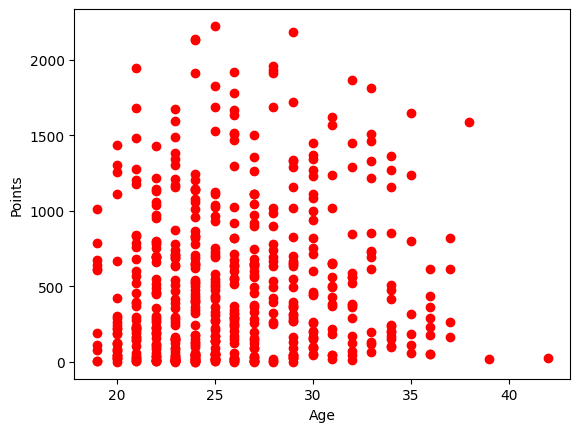

In [12]:
plt.scatter(cdf.Age, cdf.PTS, color='red')
plt.xlabel("Age")
plt.ylabel("Points")
plt.show()

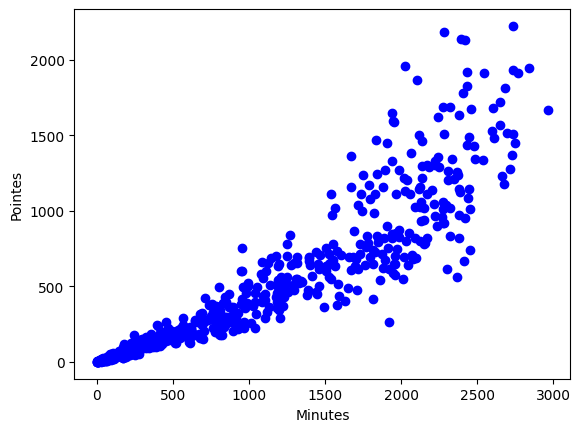

In [13]:
plt.scatter(cdf.Min, cdf.PTS, color='blue')
plt.xlabel("Minutes")
plt.ylabel("Pointes")
plt.show()

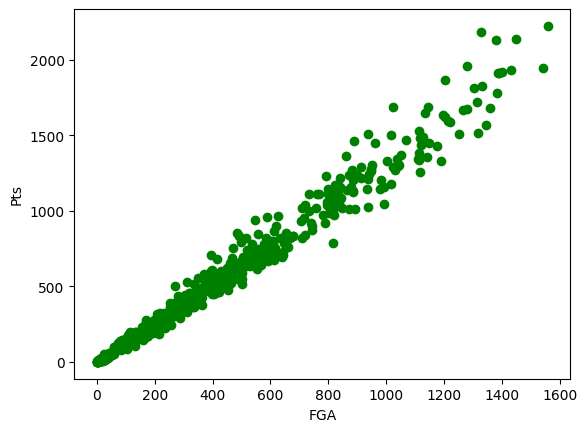

In [14]:
plt.scatter(cdf.FGA, cdf.PTS, color='green')
plt.xlabel("FGA")
plt.ylabel("Pts")
plt.show()

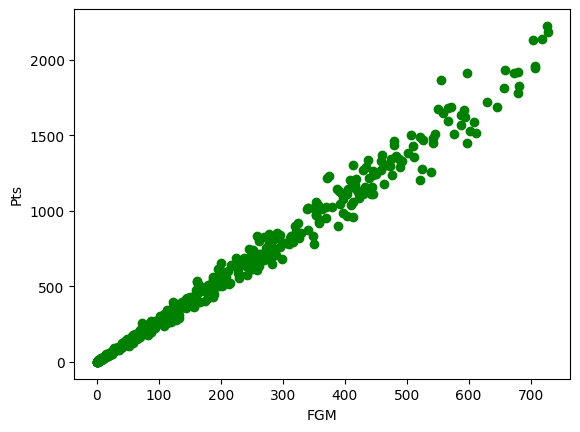

In [15]:
plt.scatter(cdf.FGM, cdf.PTS, color='green')
plt.xlabel("FGM")
plt.ylabel("Pts")
plt.show()

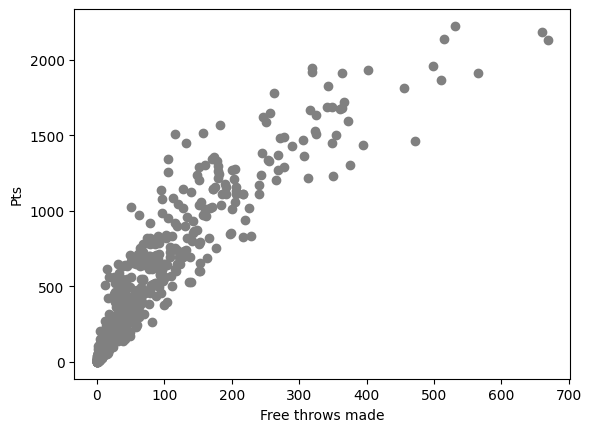

In [16]:
plt.scatter(cdf.FTM, cdf.PTS, color='grey')
plt.xlabel("Free throws made")
plt.ylabel("Pts")
plt.show()

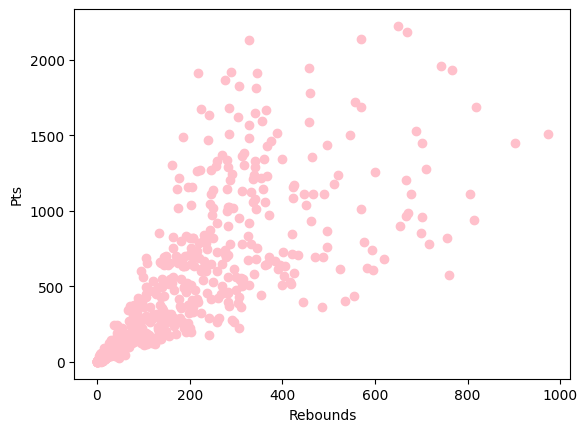

In [17]:
plt.scatter(cdf.REB, cdf.PTS, color='pink')
plt.xlabel("Rebounds")
plt.ylabel("Pts")
plt.show()

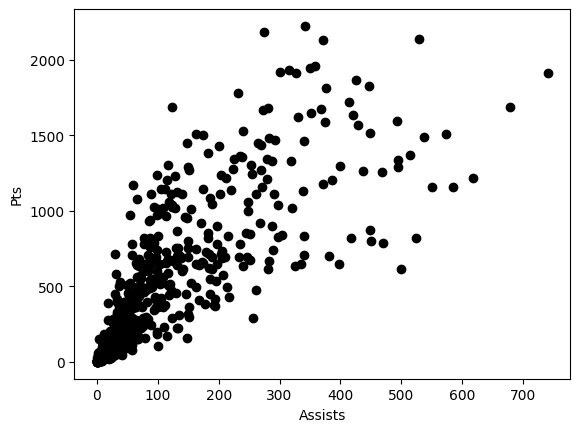

In [18]:
plt.scatter(cdf.AST, cdf.PTS, color='black')
plt.xlabel("Assists")
plt.ylabel("Pts")
plt.show()

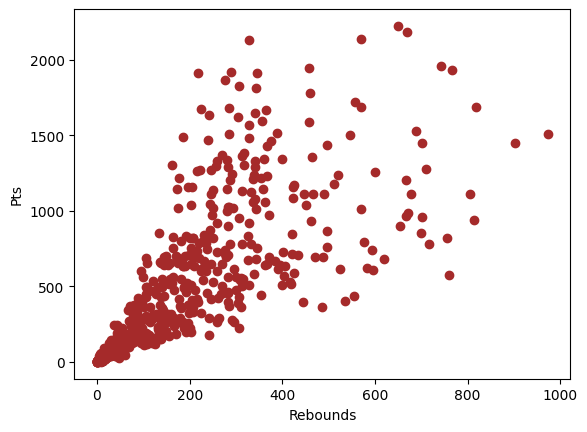

In [19]:
plt.scatter(cdf.REB, cdf.PTS, color='brown')
plt.xlabel("Rebounds")
plt.ylabel("Pts")
plt.show()

Train

In [22]:
msk=np.random.rand(len(df))<0.5
train=cdf[msk]
test=cdf[~msk]

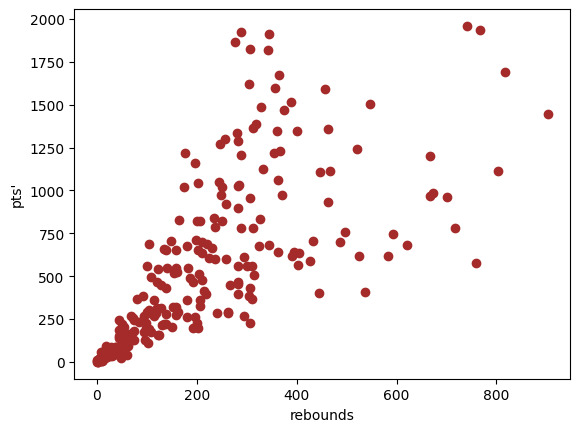

In [23]:
plt.scatter(train.REB, train.PTS, color='brown')
plt.xlabel("rebounds")
plt.ylabel("pts'")
plt.show()

Splitting data set

In [24]:
X = df.drop('PTS',axis = 1)
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [25]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 431 rows and 17 columns.
X_test have 108 rows and 17 columns.


Multiple Linear Regression

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [27]:
x=np.asanyarray(train[['Age','Min','FGA','FGM','REB','AST']])
y=np.asanyarray(train[['PTS']])
regr.fit (x,y)
print('Coefficients:', regr.coef_)

Coefficients: [[ 1.917366   -0.00338929  0.36501417  2.07546916 -0.10908651  0.0465668 ]]


In [28]:
y_hat=regr.predict(test[['Age','Min','FGA','FGM','REB','AST']])
x = np.asanyarray(test[['Age','Min','FGA','FGM','REB','AST']])
y = np.asanyarray(test[['PTS']])
print("mean squared error (MSE): %.2f"
        % np.mean((y_hat -y)** 2))

print('Variance score: %.2f' % regr.score(x,y))

mean squared error (MSE): 2221.25
Variance score: 0.99


Linear Regression

In [29]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('PTS', axis=1), df['PTS'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.25
Best random state: 1
Best R2 score: 0.9999997344135314


In [30]:
X_train, X_test , y_train, y_test = train_test_split(df.drop('PTS', axis=1), df['PTS'], test_size=.2, random_state=43)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = LRmodel.predict(X_test)
r2_score(y_test, y_pred)

0.9999996272411901

KNN

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [33]:
df['PTS'].value_counts()

PTS
9      6
0      5
17     4
3      4
6      4
      ..
709    1
712    1
713    1
715    1
490    1
Name: count, Length: 415, dtype: int64

In [34]:
x = df[['Age','Min','FGA','FGM','REB','AST']].values 
x[0:5]

array([[  25. , 2732.2, 1559. ,  727. ,  649. ,  342. ],
       [  29. , 2284.1, 1328. ,  728. ,  670. ,  274. ],
       [  24. , 2390.5, 1449. ,  719. ,  569. ,  529. ],
       [  24. , 2416. , 1381. ,  704. ,  329. ,  371. ],
       [  28. , 2023.6, 1278. ,  707. ,  742. ,  359. ]])

In [35]:
y= df['PTS'].values
y[0:5]

array([2225, 2183, 2138, 2135, 1959])

In [36]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.22505245,  1.96927268,  3.13063065,  3.00485851,  2.48138068,
         1.74924844],
       [ 0.70269722,  1.42743267,  2.50504314,  3.01047063,  2.59698684,
         1.22398235],
       [-0.45698986,  1.55609095,  2.83273184,  2.95996154,  2.04097626,
         3.19373019],
       [-0.45698986,  1.58692541,  2.6485762 ,  2.87577973,  0.71976299,
         1.97325898],
       [ 0.4707598 ,  1.11243753,  2.36963459,  2.89261609,  2.99335082,
         1.88056496]])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.4, random_state= 4)
print ('train set:', x_train.shape, y_train.shape)
print ('test set:', x_test.shape, y_test.shape)

train set: (323, 6) (323,)
test set: (216, 6) (216,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
k = 5
neigh=KNeighborsClassifier(n_neighbors =k).fit(x_train,y_train)
neigh

KNeighborsClassifier()

In [41]:
#predict
yhat = neigh.predict(x_test)
yhat[0:5]

array([ 642, 1029,   85,  615,  379])

In [42]:
from sklearn import metrics
print("Train set Accuracy:",metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("test set accuracy:", metrics.accuracy_score(y_test,yhat))

Train set Accuracy: 0.13622291021671826
test set accuracy: 0.009259259259259259


In [43]:
Ks= 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range (1,Ks):
    neigh=KNeighborsClassifier(n_neighbors =n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.00462963, 0.00925926, 0.01388889, 0.01388889, 0.00925926,
       0.00925926, 0.01388889, 0.01388889, 0.01388889])

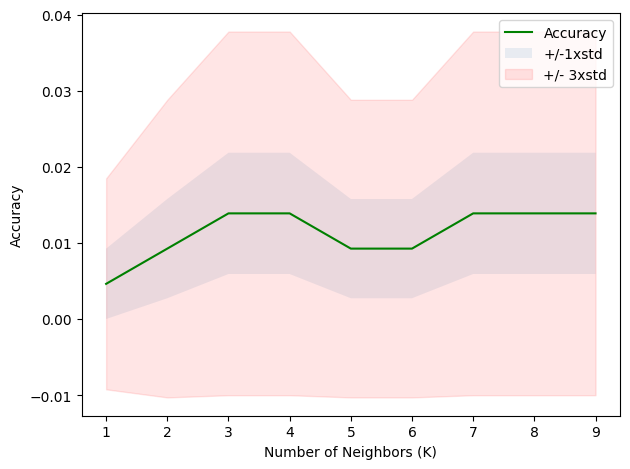

In [46]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc -1 * std_acc,mean_acc +1*std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Accuracy','+/-1xstd','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [47]:
print("the best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

the best accuracy was with 0.013888888888888888 with k= 3
